# LOAD PACKAGES

In [1]:
# basic tools
import os
import pandas as pd
import numpy as np

# image preprocessing
import cv2

# tensorflow tools
import tensorflow as tf

# image processsing
from tensorflow.keras.preprocessing.image import (load_img,
                                                  img_to_array,
                                                  ImageDataGenerator)
# VGG16 model
from tensorflow.keras.applications.vgg16 import (preprocess_input,
                                                 decode_predictions,
                                                 VGG16)

# layers
from tensorflow.keras.layers import (Flatten, 
                                     Dense, 
                                     Dropout, 
                                     BatchNormalization)
# generic model object
from tensorflow.keras.models import Model

# optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD

# early stopping
from tensorflow.keras.callbacks import EarlyStopping

#scikit-learn
from sklearn.metrics import classification_report

# for plotting
import matplotlib.pyplot as plt

2023-05-17 10:26:29.705006: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 10:26:29.754872: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 10:26:29.756132: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 10:26:30.480635: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# FUNCTIONS

In [2]:
# courtesy of Ross
def plot_history(H, epochs):
    plt.style.use("seaborn-colorblind")

    plt.figure(figsize=(12,6))
    
    plt.subplot(1,2,1)
    plt.plot(
        np.arange(0, epochs), 
        H.history["loss"], 
        label = "train_loss")
    plt.plot(
        np.arange(0, epochs), 
        H.history["val_loss"], 
        label = "val_loss", 
        linestyle = ":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(
        np.arange(0, epochs), 
        H.history["accuracy"], 
        label = "train_acc")
    plt.plot(
        np.arange(0, epochs), 
        H.history["val_accuracy"], 
        label = "val_acc", 
        linestyle = ":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()

    plt.show()

# CONFIGURE DIRECTORIES

In [3]:
# OVERALL LOCATION OF DATA
base_dir = os.path.join(
    "..",
    "..",
    "data")

# LOCATION OF TEST, TRAIN AND VALIDATION FOLDERS
train_dir = os.path.join(
    base_dir,
    "train")
val_dir = os.path.join(
    base_dir,
    "val")
test_dir = os.path.join(
    base_dir,
    "test")

# LOCATION OF CATEGORIES WITHIN TRAIN SPLIT
train_coast_dir = os.path.join(
    train_dir,
    "Coast")
train_desert_dir = os.path.join(
    train_dir,
    "Desert")
train_forest_dir = os.path.join(
    train_dir,
    "Forest")
train_glacier_dir = os.path.join(
    train_dir,
    "Glacier")
train_mountain_dir = os.path.join(
    train_dir,
    "Mountain")

# LOCATION OF CATEGORIES WITHIN VALIDATION SPLIT
val_coast_dir = os.path.join(
    val_dir,
    "Coast")
val_desert_dir = os.path.join(
    val_dir,
    "Desert")
val_forest_dir = os.path.join(
    val_dir,
    "Forest")
val_glacier_dir = os.path.join(
    val_dir,
    "Glacier")
val_mountain_dir = os.path.join(
    val_dir,
    "Mountain")

# LOCATION OF CATEGORIES WITHIN TEST SPLIT
test_coast_dir = os.path.join(
    test_dir,
    "Coast")
test_desert_dir = os.path.join(
    test_dir,
    "Desert")
test_forest_dir = os.path.join(
    test_dir,
    "Forest")
test_glacier_dir = os.path.join(
    test_dir,
    "Glacier")
test_mountain_dir = os.path.join(
    test_dir,
    "Mountain")

# COUNT NUMBER OF IMAGES

In [33]:
# IMAGES IN CATEGORIES IN TRAINING SPLIT
num_train_coast = len(
    os.listdir(
        train_coast_dir))
num_train_desert = len(
    os.listdir(
        train_desert_dir))
num_train_forest = len(
    os.listdir(
        train_forest_dir))
num_train_glacier = len(
    os.listdir(
        train_glacier_dir))
num_train_mountain = len(
    os.listdir(
        train_mountain_dir))

# IMAGES IN CATEGORIES IN VALIDATION SPLIT
num_val_coast = len(
    os.listdir(
        val_coast_dir))
num_val_desert = len(
    os.listdir(
        val_desert_dir))
num_val_forest = len(
    os.listdir(
        val_forest_dir))
num_val_glacier = len(
    os.listdir(
        val_glacier_dir))
num_val_mountain = len(
    os.listdir(
        val_mountain_dir))

# IMAGES IN CATEGORIES IN TEST SPLIT
num_test_coast = len(
    os.listdir(
        test_coast_dir))
num_test_desert = len(
    os.listdir(
        test_desert_dir))
num_test_forest = len(
    os.listdir(
        test_forest_dir))
num_test_glacier = len(
    os.listdir(
        test_glacier_dir))
num_test_mountain = len(
    os.listdir(
        test_mountain_dir))

num_train = num_train_coast + num_train_desert + num_train_forest + num_train_glacier + num_train_mountain
num_val = num_val_coast + num_val_desert + num_val_forest + num_val_glacier + num_val_mountain
num_test = num_test_coast + num_test_desert + num_test_forest + num_test_glacier + num_test_mountain

num_total = num_train + num_val + num_test

In [34]:
print("TOTAL IMAGES:", num_total)
print("...")
print("TOTAL TRAIN:", num_train)
print("Coast:", num_train_coast)
print("Desert:", num_train_desert)
print("Forest:", num_train_forest)
print("Glacier:", num_train_glacier)
print("Mountain:", num_train_mountain)
print("...")
print("TOTAL VALIDATION:", num_val)
print("Coast:", num_val_coast)
print("Desert:", num_val_desert)
print("Forest:", num_val_forest)
print("Glacier:", num_val_glacier)
print("Mountain:", num_val_mountain)
print("...")
print("TOTAL TEST:", num_test)
print("Coast:", num_test_coast)
print("Desert:", num_test_desert)
print("Forest:", num_test_forest)
print("Glacier:", num_test_glacier)
print("Mountain:", num_test_mountain)


TOTAL IMAGES: 12000
...
TOTAL TRAIN: 10000
Coast: 2000
Desert: 2000
Forest: 2000
Glacier: 2000
Mountain: 2000
...
TOTAL VALIDATION: 1500
Coast: 300
Desert: 300
Forest: 300
Glacier: 300
Mountain: 300
...
TOTAL TEST: 500
Coast: 100
Desert: 100
Forest: 100
Glacier: 100
Mountain: 100


# IMAGE PREPROCESSING

In [35]:
# SOME NECESSARY VARIABLES
IMG_SHAPE = 224
batch_size = 128

In [36]:
# DEFINE DATA GENERATOR
# Normalize image values.
# Allow for horizontal flipping and rotation (data augmentation).
datagen = ImageDataGenerator(
    rescale = 1./255, 
    horizontal_flip = True, 
    rotation_range = 20,
    preprocessing_function = lambda x: tf.image.resize(
        x, 
        (IMG_SHAPE, IMG_SHAPE)))

In [37]:
# TRAINING - FLOW FROM FOLDER
train_data_gen = datagen.flow_from_directory(
    directory = train_dir,
    batch_size = batch_size,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    shuffle = True,
    class_mode = 'categorical')

Found 10000 images belonging to 5 classes.


In [38]:
# VALIDATION - FLOW FROM FOLDER
val_data_gen = datagen.flow_from_directory(
    directory = val_dir,
    batch_size = batch_size,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    shuffle = True,
    class_mode = 'categorical')

Found 1500 images belonging to 5 classes.


In [39]:
# TEST - FLOW FROM FOLDER
test_data_gen = datagen.flow_from_directory(
    directory = test_dir,
    batch_size = batch_size,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    shuffle = False,
    class_mode = 'categorical')

Found 500 images belonging to 5 classes.


# LOAD MODEL

In [4]:
# load model without classifier layers
model = VGG16(
    include_top = False, 
    pooling = 'avg',
    input_shape = (224, 224, 3))

In [5]:
# mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False

In [6]:
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
bn = BatchNormalization()(flat1)
class1 = Dense(
    256, 
    activation = 'relu')(bn)
class2 = Dense(
    128, 
    activation = 'relu')(class1)
output = Dense(
    5, 
    activation = 'softmax')(class2)

In [7]:
# define new model
model = Model(
    inputs = model.inputs, 
    outputs = output)

In [8]:
# configure learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10000,
    decay_rate = 0.9)
sgd = SGD(learning_rate = lr_schedule)

In [9]:
# compile model
model.compile(
    optimizer = sgd,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [19]:
summary_path = os.path.join(
    "..",
    "out",
    "model_summary.txt"
)

In [21]:
def save_summary(s):
    with open(summary_path, 'a') as f:
        print(s, file = f)


In [22]:
# summarize
model.summary(print_fn = save_summary)

In [47]:
# early stopping
early_stop = EarlyStopping(
    monitor = 'val_loss', 
    patience = 5,  
    mode = 'min', 
    restore_best_weights = True)

In [48]:
H = model.fit(
    train_data_gen,
    validation_data = val_data_gen,
    epochs = 20,
    callbacks = [early_stop])

Epoch 1/20


2023-05-03 16:02:31.573420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - ETA: 0s - loss: 1.5177 - accuracy: 0.3445

2023-05-03 16:07:46.841191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - 364s 9s/step - loss: 1.5177 - accuracy: 0.3445 - val_loss: 1.5494 - val_accuracy: 0.3720
Epoch 2/20
40/40 [==============================] - 361s 9s/step - loss: 1.2732 - accuracy: 0.5003 - val_loss: 1.4991 - val_accuracy: 0.4260
Epoch 3/20
40/40 [==============================] - 321s 8s/step - loss: 1.1545 - accuracy: 0.5598 - val_loss: 1.4390 - val_accuracy: 0.4600
Epoch 4/20
40/40 [==============================] - 311s 8s/step - loss: 1.0704 - accuracy: 0.5931 - val_loss: 1.3755 - val_accuracy: 0.4947
Epoch 5/20
40/40 [==============================] - 408s 10s/step - loss: 1.0121 - accuracy: 0.6143 - val_loss: 1.3020 - val_accuracy: 0.5400
Epoch 6/20
40/40 [==============================] - 704s 18s/step - loss: 0.9698 - accuracy: 0.6327 - val_loss: 1.2388 - val_accuracy: 0.5513
Epoch 7/20
40/40 [==============================] - 375s 9s/step - loss: 0.9316 - accuracy: 0.6530 - val_loss: 1.1663 - val_accuracy: 0.5920
Epoch 8/20
40/40 [====

/tmp/ipykernel_25232/3076450021.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


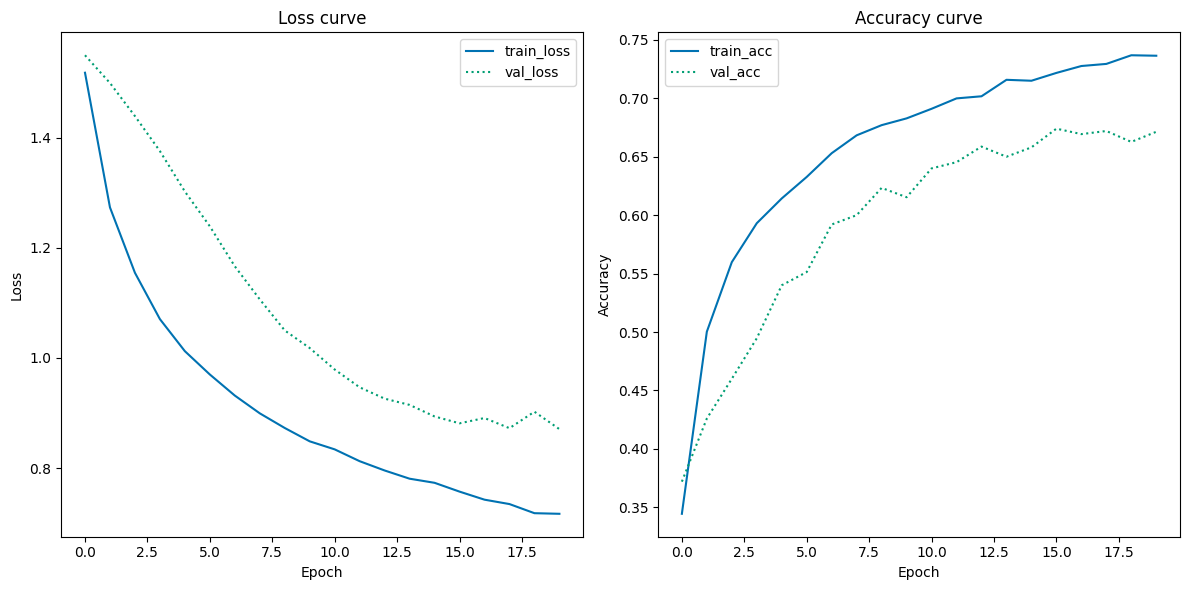

In [49]:
plot = plot_history(H, 20)

In [50]:
predictions = model.predict(
    test_data_gen, 
    batch_size = batch_size)

2023-05-03 18:14:38.079518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 17s 7s/step


In [51]:
y_true = test_data_gen.classes

In [52]:
y_pred = np.argmax(predictions, axis = 1)

In [53]:
class_labels = list(test_data_gen.class_indices.keys())

In [54]:
report = classification_report(
    y_true, 
    y_pred, 
    target_names = class_labels)

In [55]:
print(report)

              precision    recall  f1-score   support

       Coast       0.78      0.68      0.73       100
      Desert       0.75      0.86      0.80       100
      Forest       0.88      0.86      0.87       100
     Glacier       0.67      0.78      0.72       100
    Mountain       0.61      0.52      0.56       100

    accuracy                           0.74       500
   macro avg       0.74      0.74      0.74       500
weighted avg       0.74      0.74      0.74       500

